# Price Prediction using Regression

This is a tickets pricing monitoring system. It scrapes tickets pricing data periodically and stores it in a database. Ticket pricing changes based on demand and time, and there can be significant difference in price. We are creating this product mainly with ourselves in mind. Users can set up alarms using an email, choosing an origin and destination (cities), time (date and hour range picker) choosing a price reduction over mean price, etc.

**Following is the description for columns in the dataset**<br>
- insert_date: date and time when the price was collected and written in the database<br>
- origin: origin city <br>
- destination: destination city <br>
- start_date: train departure time<br>
- end_date: train arrival time<br>
- train_type: train service name<br>
- price: price<br>
- train_class: ticket class, tourist, business, etc.<br>
- fare: ticket fare, round trip, etc <br>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()

In [2]:
def adjR2 (xtest,ytest,r2):
	n = len(ytest)
	k = xtest.shape[-1]
	adj_r2 = 1 - ((1 - r2)*(n - 1)) / (n - k -1)
	print('The adjusted R2 is:', adj_r2)
	return adj_r2

#### **Task 1: Import Dataset and create a copy of that dataset**

In [3]:
#write code here
data = pd.read_csv("data1.csv")
df = data.copy() 

#### **Task 2: Display first five rows** 

In [4]:
#write code here
df.head()

,Unnamed: 0,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,702,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 15:00:00,2019-06-02 19:42:00,MD-AVE,59.50,Turista con enlace,Flexible
1,703,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:03:00,MD-AVE,34.65,Turista con enlace,Promo +
2,704,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:10:00,MD-LD,39.95,Turista con enlace,Promo +
3,705,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 22:14:00,MD-AVE,40.60,Turista con enlace,Promo +
4,706,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 18:55:00,2019-06-02 23:03:00,ALVIA,27.90,Turista,Promo


#### **Task 3: Drop 'unnamed: 0' column**

In [5]:
#write code here
df.drop(['Unnamed: 0'], axis=1, inplace=True)

#### **Task 4: Check the number of rows and columns**

In [6]:
#write code here
df.shape

(215909, 9)

#### **Task 5: Check data types of all columns**

In [7]:
#write code here
df.dtypes

insert_date     object
origin          object
destination     object
start_date      object
end_date        object
train_type      object
price          float64
train_class     object
fare            object
dtype: object

#### **Task 6: Check summary statistics**

In [8]:
#write code here
df.describe()

,price
count,202321.000000
mean,56.723877
std,25.531787
min,16.600000
25%,28.350000
50%,53.400000
75%,76.300000
max,206.800000


#### **Task 7: Check summary statistics of all columns, including object dataypes**

In [9]:
df.describe(include='all')

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
count,215909,215909,215909,215909,215909,215909,202321.000000,215266,215266
unique,30543,5,5,2231,2870,16,NaN,5,5
top,2019-05-09 15:02:02,MADRID,MADRID,2019-06-02 17:30:00,2019-06-02 23:03:00,AVE,NaN,Turista,Promo
freq,90,110440,105469,2089,1278,126577,NaN,164016,132065
mean,NaN,NaN,NaN,NaN,NaN,NaN,56.723877,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,25.531787,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,16.600000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,28.350000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,53.400000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,76.300000,NaN,NaN


**Question: Explain the summary statistics for the above data set**

**Answer:**

#### **Task 8: Check null values in dataset**

In [10]:
#write code here
df.isnull().sum()

insert_date        0
origin             0
destination        0
start_date         0
end_date           0
train_type         0
price          13588
train_class      643
fare             643
dtype: int64

#### **Task 9: Fill the Null values in the 'price' column.**<br>
*Hint: Take mean*

In [11]:
#write code here
df['price'].fillna(df['price'].mean(), inplace = True)

#### **Task 10: Drop the rows containing Null values in the attributes train_class and fare**

In [12]:
#write code here
df.dropna(inplace=True)


#### **Task 11: Drop 'insert_date'**

In [13]:
#write code here
df.drop(['insert_date'], axis=1, inplace=True)

**Check null values again in dataset**

In [14]:
#write code here
df.isnull().sum()

origin         0
destination    0
start_date     0
end_date       0
train_type     0
price          0
train_class    0
fare           0
dtype: int64

#### **Task 12: Plot number of people boarding from different stations**


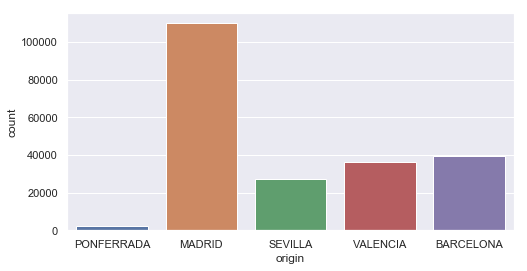

In [15]:
#write code here
sns.set(rc={'figure.figsize':(8,4)})
sns.countplot(x='origin', data=df);

**Question: What insights do you get from the above plot?**

**Answer:** Over 10k+ people boarded from madrid

#### **Task 13: Plot number of people for the destination stations**


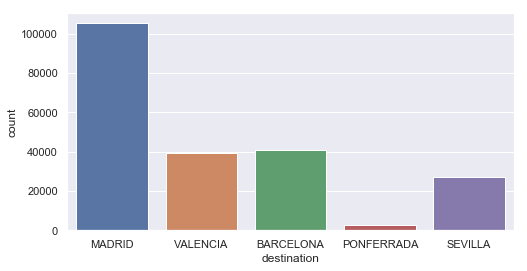

In [16]:
#write code here
sns.set(rc={'figure.figsize':(8,4)})
sns.countplot(x='destination', data=df);

**Question: What insights do you get from the above graph?**

**Answer:** Over 10k+ people goes to madrid 

#### **Task 14: Plot different types of train that runs in Spain**


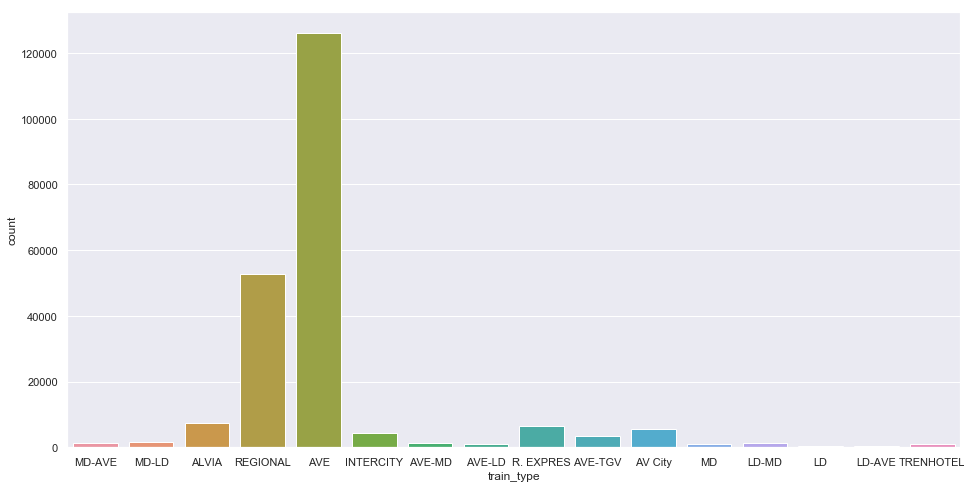

In [17]:
#write code here
sns.set(rc={'figure.figsize':(16,8)})
sns.countplot(x='train_type', data=df);

**Question: Which train runs the maximum in number as compared to other train types?**

**Answer:** AVE Runs the maximum


#### **Task 15: Plot number of trains of different class**


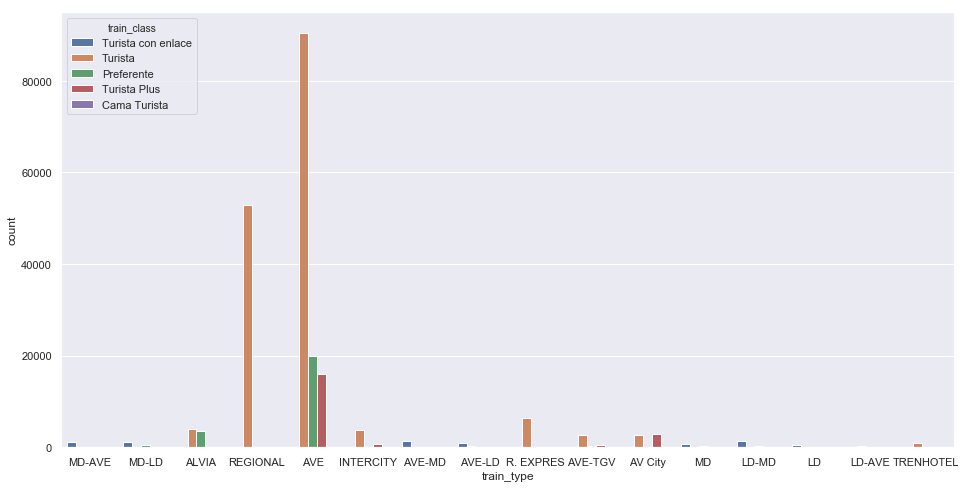

In [18]:
#write code here
sns.set(rc={'figure.figsize':(16,8)})
sns.countplot(x='train_type', hue='train_class', data=df);

**Question: Which the most common train class for traveling among people in general?**

**Answer:** Most people travel in Turista Class


#### **Task 16: Plot number of tickets bought from each category**


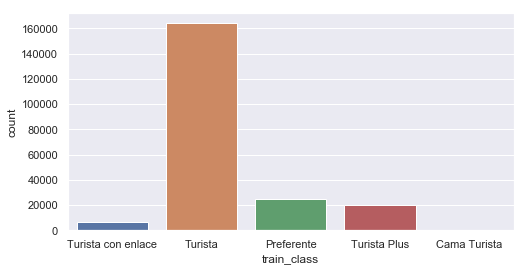

In [19]:
#write code here
sns.set(rc={'figure.figsize':(8,4)})
sns.countplot(x='train_class', data=df);

**Question: Which the most common tickets are bought?**

**Answer:** Turista are the most bought tickets

#### **Task 17: Plot distribution of the ticket prices**

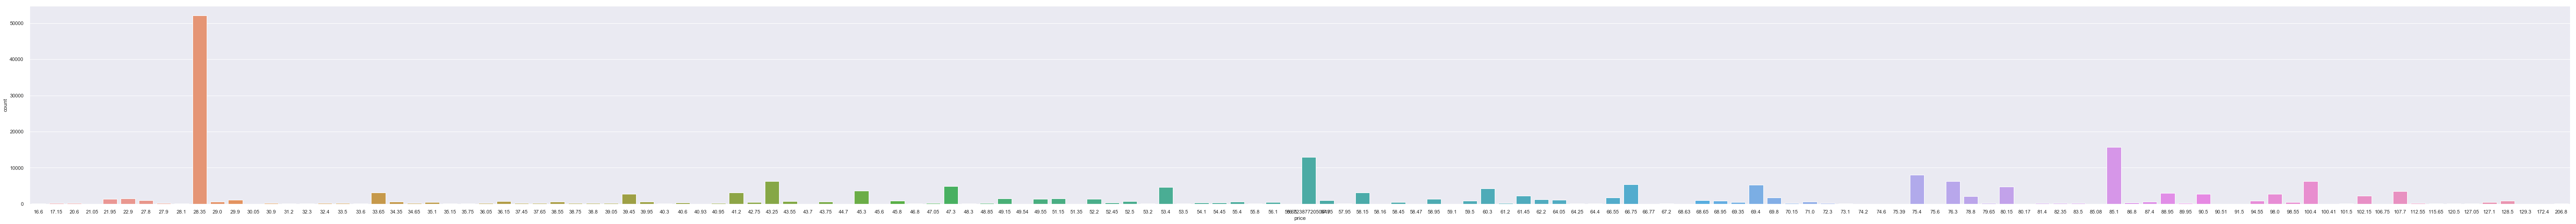

In [108]:
#write code here
sns.set(rc={'figure.figsize':(100,8)})
sns.countplot(x='price', data=df);

**Question: What readings can you get from the above plot?**

**Answer:** Most tickets are sold for 28.35$

###### **Task 18: Show train_class vs price through boxplot**

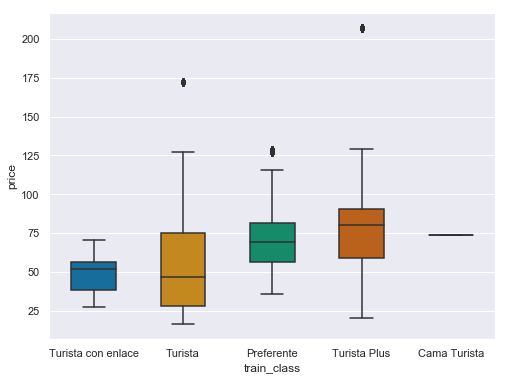

In [21]:
#write code here
sns.set(rc={'figure.figsize':(8,6)})

sns.boxplot(y='price', x='train_class', data=df, width=0.5, palette="colorblind")

**Question: What pricing trends can you find out by looking at the plot above?**

**Answer:** most of the people buy ticket in the range of 50 to 90

#### **Task 19: Show train_type vs price through boxplot**


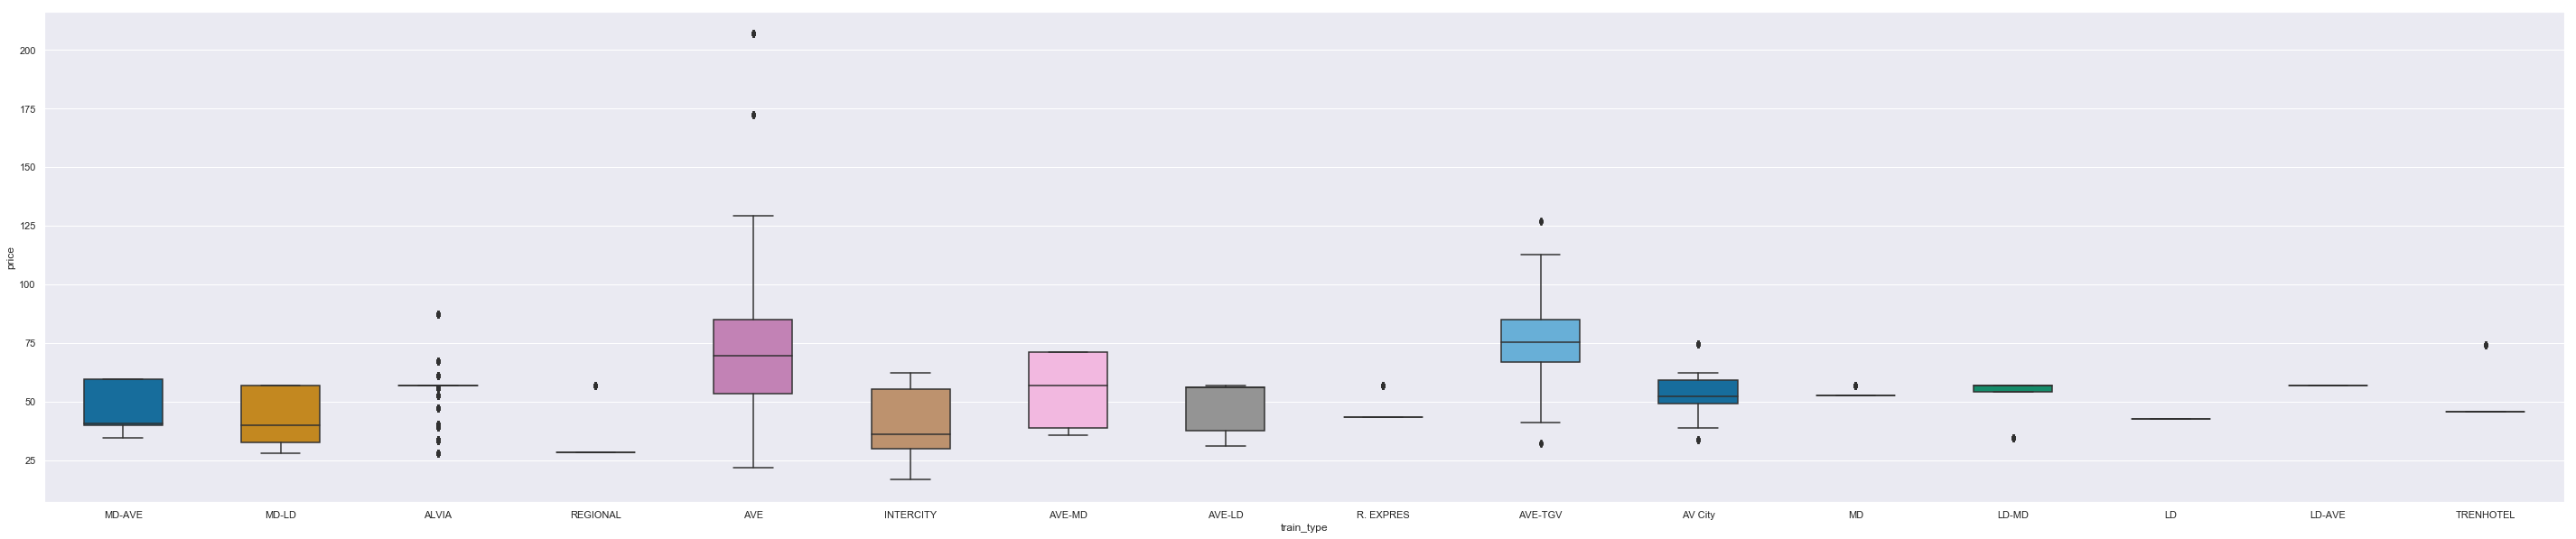

In [22]:
#write code here
sns.set(rc={'figure.figsize':(50,10)})
sns.boxplot(y='price', x='train_type', data=df, width=0.5, palette="colorblind")

**Question: Which type of trains cost more as compared to others?**

**Answer:** AVE-TGV cost the most



## Feature Engineering


In [23]:
df = df.reset_index()

**Finding the travel time between the place of origin and destination**<br>
We need to find out the travel time for each entry which can be obtained from the 'start_date' and 'end_date' column. Also if you see, these columns are in object type therefore datetimeFormat should be defined to perform the necessary operation of getting the required time.

**Import datetime library**

In [24]:
#write code here
import datetime

In [25]:
datetimeFormat = '%Y-%m-%d %H:%M:%S'
def fun(a,b):
    diff = datetime.datetime.strptime(b, datetimeFormat)- datetime.datetime.strptime(a, datetimeFormat)
    return(diff.seconds/3600.0)                  
    

In [26]:
df['travel_time_in_hrs'] = df.apply(lambda x:fun(x['start_date'],x['end_date']),axis=1) 

In [27]:
df

,index,origin,destination,start_date,end_date,train_type,price,train_class,fare,travel_time_in_hrs
0,0,PONFERRADA,MADRID,2019-06-02 15:00:00,2019-06-02 19:42:00,MD-AVE,59.500000,Turista con enlace,Flexible,4.700000
1,1,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:03:00,MD-AVE,34.650000,Turista con enlace,Promo +,5.800000
2,2,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:10:00,MD-LD,39.950000,Turista con enlace,Promo +,5.916667
3,3,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 22:14:00,MD-AVE,40.600000,Turista con enlace,Promo +,4.983333
4,4,PONFERRADA,MADRID,2019-06-02 18:55:00,2019-06-02 23:03:00,ALVIA,27.900000,Turista,Promo,4.133333
5,5,MADRID,VALENCIA,2019-06-17 06:08:00,2019-06-17 12:55:00,REGIONAL,28.350000,Turista,Adulto ida,6.783333
6,6,MADRID,VALENCIA,2019-06-17 12:21:00,2019-06-17 19:04:00,REGIONAL,28.350000,Turista,Adulto ida,6.716667
7,7,MADRID,VALENCIA,2019-06-17 16:05:00,2019-06-17 22:47:00,REGIONAL,28.350000,Turista,Adulto ida,6.700000
8,8,MADRID,VALENCIA,2019-06-16 06:20:00,2019-06-16 12:55:00,REGIONAL,28.350000,Turista,Adulto ida,6.583333
9,9,MADRID,VALENCIA,2019-06-16 12:42:00,2019-06-16 19:04:00,REGIONAL,28.350000,Turista,Adulto ida,6.366667


#### **Task 20: Remove redundant features**


**You need to remove features that are giving the related values as  'travel_time_in_hrs'**<br>
*Hint: Look for date related columns*

In [28]:
#write code here
df.drop(['start_date'], axis=1, inplace=True)
df.drop(['end_date'], axis=1, inplace=True)

We now need to find out the pricing from 'MADRID' to other destinations. We also need to find out time which each train requires for travelling. 

## **Travelling from MADRID to SEVILLA**

#### Task 21: Findout people travelling from MADRID to SEVILLA

In [29]:
#write code here
df1 = df[(df['origin'] == 'MADRID') & (df['destination'] == 'SEVILLA')]


In [30]:
df1.shape

(26961, 8)

#### Task 22: Make a plot for finding out travelling hours for each train type

/Users/Haris/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


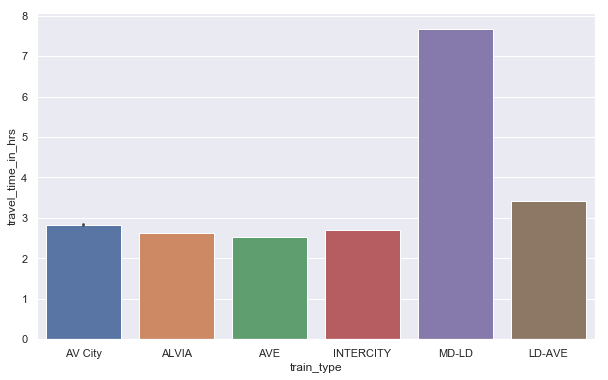

In [31]:
#write code here
sns.set(rc={'figure.figsize':(10,6)})

sns.barplot(x='train_type',y='travel_time_in_hrs',data=df1)

#### **Task 23: Show train_type vs price through boxplot**


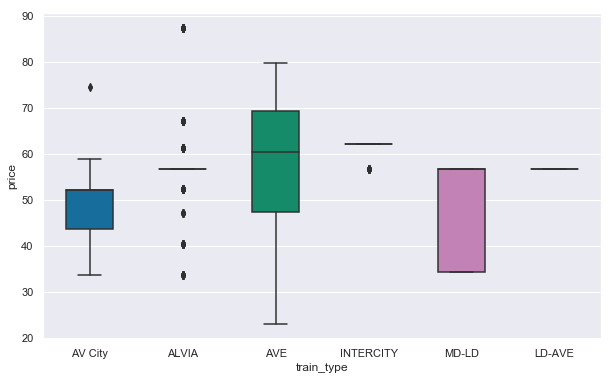

In [32]:
#write code here
sns.boxplot(y='price', x='train_type', data=df1, width=0.5, palette="colorblind")

## **Travelling from MADRID to BARCELONA**


#### Task 24: Findout people travelling from MADRID to BARCELONA

In [33]:
#write code here
df1 = df[(df['origin'] == 'MADRID') & (df['destination'] == 'BARCELONA')]

#### Task 25: Make a plot for finding out travelling hours for each train type

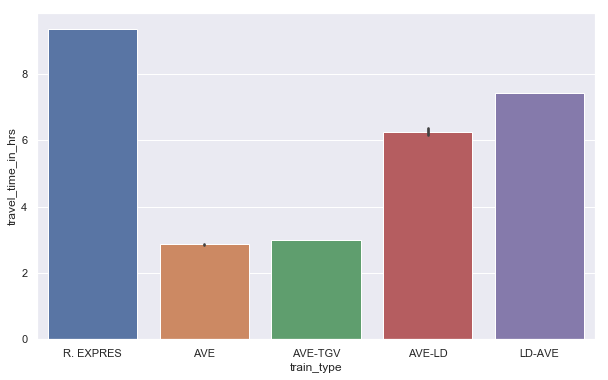

In [34]:
#write code here
sns.barplot(x='train_type',y='travel_time_in_hrs',data=df1)

#### **Task 26: Show train_type vs price through boxplot**

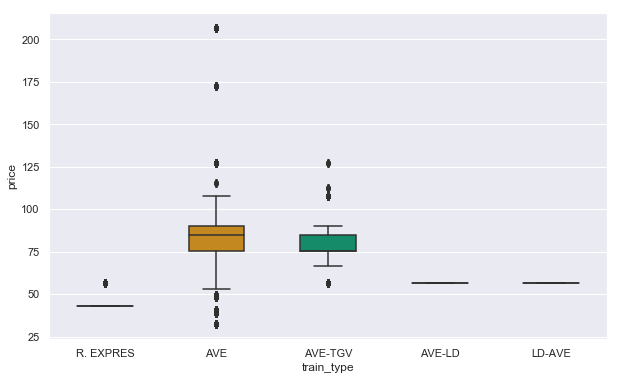

In [35]:
#write code here
sns.boxplot(y='price', x='train_type', data=df1, width=0.5, palette="colorblind")


## **Travelling from MADRID to VALENCIA**

#### Task 27: Findout people travelling from MADRID to VALENCIA

In [36]:
#write code here
df1 = df[(df['origin'] == 'MADRID') & (df['destination'] == 'VALENCIA')]

#### Task 28: Make a plot for finding out travelling hours for each train type

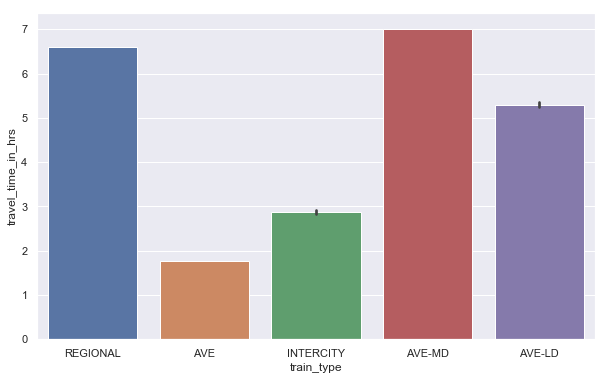

In [37]:
#write code here
sns.barplot(x='train_type',y='travel_time_in_hrs',data=df1)

#### **Task 29: Show train_type vs price through boxplot**

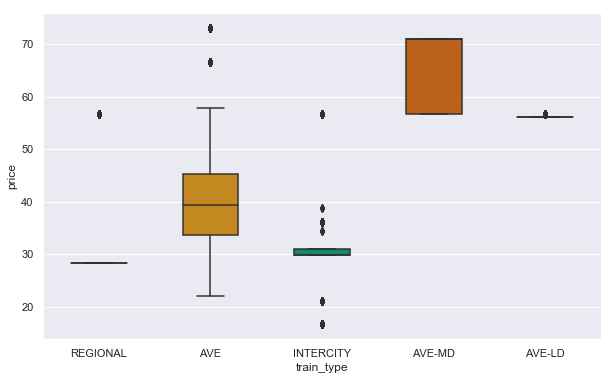

In [38]:
#write code here
sns.boxplot(y='price', x='train_type', data=df1, width=0.5, palette="colorblind")

## **Travelling from MADRID to PONFERRADA**

#### Task 30: Findout people travelling from MADRID to PONFERRADA

In [39]:
#write code here
df1 = df[(df['origin'] == 'MADRID') & (df['destination'] == 'PONFERRADA')]

#### Task 31: Make a plot for finding out travelling hours for each train type

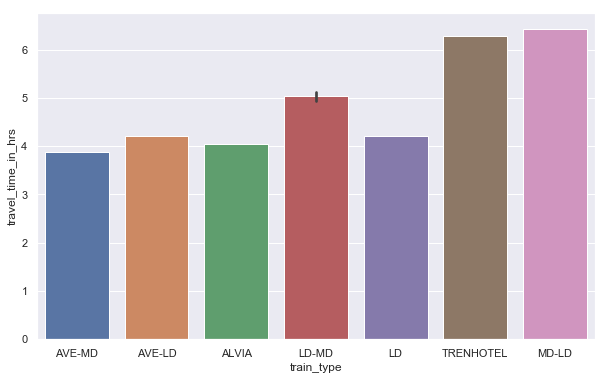

In [40]:
#write code here
sns.barplot(x='train_type',y='travel_time_in_hrs',data=df1)

#### **Task 32: Show train_type vs price through boxplot**

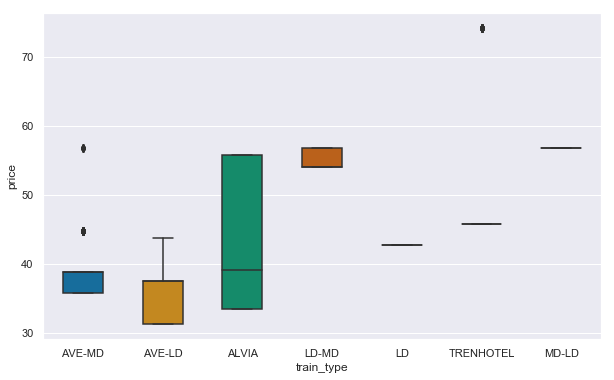

In [41]:
#write code here
sns.boxplot(y='price', x='train_type', data=df1, width=0.5, palette="colorblind")

# Applying Linear  Regression

#### Task 33: Import LabelEncoder library from sklearn 

In [42]:
#write code here
from sklearn.preprocessing import LabelEncoder

**Data Encoding**

In [43]:
lab_en = LabelEncoder()
df.iloc[:,1] = lab_en.fit_transform(df.iloc[:,1])
df.iloc[:,2] = lab_en.fit_transform(df.iloc[:,2])
df.iloc[:,3] = lab_en.fit_transform(df.iloc[:,3])
df.iloc[:,5] = lab_en.fit_transform(df.iloc[:,5])
df.iloc[:,6] = lab_en.fit_transform(df.iloc[:,6])

In [44]:
df.head()

,index,origin,destination,train_type,price,train_class,fare,travel_time_in_hrs
0,0,2,1,11,59.50,4,1,4.700000
1,1,2,1,11,34.65,4,4,5.800000
2,2,2,1,12,39.95,4,4,5.916667
3,3,2,1,11,40.60,4,4,4.983333
4,4,2,1,0,27.90,2,3,4.133333


#### Task 34: Separate the dependant and independant variables

In [45]:
df.shape

(215266, 8)

In [46]:
#write code here
X = df.drop(['price'], axis=1) #pridictors
Y = df[['price']]  #Labels
print(X.shape)
print(Y.shape)

(215266, 7)
(215266, 1)


#### Task 35: Import test_train_split from sklearn

In [47]:
#write code here
from sklearn.model_selection import train_test_split

#### Task 36:**Split the data into training and test set**

In [48]:
#write code here
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.30, random_state=25,shuffle=True)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(150686, 7) (150686, 1)
(64580, 7) (64580, 1)


#### Task 37: Import LinearRegression library from sklearn

In [49]:
#write code here
from sklearn.linear_model import LinearRegression

## Linear Reggression

In [50]:
#write code here
lr = LinearRegression()

In [51]:
#write code here
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Task 39: Find out the predictions using test data set.

In [52]:
#write code here
test_pred =  lr.predict(X_test)

#### Task 40: Find out the predictions using training data set.

In [53]:
#write code here
train_pred = lr.predict(X_train)

#### Task 41: Import r2_score library form sklearn

In [54]:
#write code here
from sklearn.metrics import r2_score

#### Task 42: Find out the R2 Score for test data and print it.

## R2 Score Linear Regression

In [55]:
#write code here
lr_r2_test= r2_score(Y_test,test_pred)

In [56]:
lr_r2_train = r2_score(Y_train,train_pred)

Comaparing training and testing R2 scores

In [57]:
print('R2 score for Linear Regression Testing Data is: ', lr_r2_train)
print('R2 score for Linear Regression Testing Data is: ', lr_r2_test)

R2 score for Linear Regression Testing Data is:  0.7256800103046104
R2 score for Linear Regression Testing Data is:  0.7309207961509145


## Adjusted R2 Linear Regression

In [58]:
ad_lr_r2_test= adjR2(X_test,Y_test,lr_r2_test)

The adjusted R2 is: 0.7308916263183719


## Mean Squared Error Linear Regression

In [59]:
from sklearn.metrics import mean_squared_error
mse_lr_train = mean_squared_error(Y_train, train_pred)
mse_lr_test = mean_squared_error(Y_test, test_pred)
print('Mean Squared Error for Linear Regression Training Data is: ', mse_lr_train)
print('Mean Squared Error for Linear Regression Testing Data is: ', mse_lr_test)

Mean Squared Error for Linear Regression Training Data is:  168.263339341312
Mean Squared Error for Linear Regression Testing Data is:  164.40533024454444


## Root Mean Squared Error Linear Regression

In [60]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_lr_train = sqrt(mean_squared_error(Y_train, train_pred))
rmse_lr_test = sqrt(mean_squared_error(Y_test, test_pred))
print('Root Mean Squared Error for Linear Regression Training Data is: ', rmse_lr_train)
print('Root Mean Squared Error for Linear Regression Testing Data is: ', rmse_lr_test)

Root Mean Squared Error for Linear Regression Training Data is:  12.971635954701782
Root Mean Squared Error for Linear Regression Testing Data is:  12.822064195929782


In [117]:
print('R2 score for KNN Regression Testing Data is: ', knn_r2_test)
print('Adujusted R2 score for KNN Regression Testing Data is: ', ad_knn_r2_test)
print('Mean Squared Error for KNN Regression Testing Data is: ', mse_knn_test)
print('Root Mean Squared Error for KNN Regression Testing Data is: ', rmse_knn_test)

R2 score for KNN Regression Testing Data is:  0.7828560076076412
Adujusted R2 score for KNN Regression Testing Data is:  0.7828324678698795
Mean Squared Error for KNN Regression Testing Data is:  132.67331428521297
Root Mean Squared Error for KNN Regression Testing Data is:  11.51839026449499


## Residual Plot Linear Regression

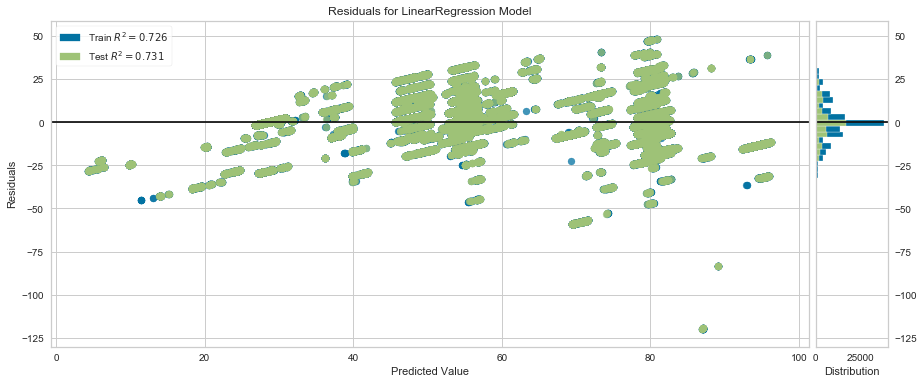

In [61]:
from yellowbrick.regressor import ResidualsPlot

plt.figure(figsize=(15,6)) 
visualizer = ResidualsPlot(lr,hist =True)
visualizer.fit(X_train.values, Y_train.values)  
visualizer.score(X_test.values, Y_test.values)  
visualizer.poof()   

# Applying Polynomial Regression

#### Task 44: Import PolynomialFeatures from sklearn

In [62]:
#write code here
from sklearn.preprocessing import PolynomialFeatures

#### Task 45: Make and object of default Polynomial Features

In [63]:
#write code here
poly_reg = PolynomialFeatures(degree=2)

#### Task 46: Transform the features to higher degree features.

In [64]:
#write code here
X_train_poly,X_test_poly = poly_reg.fit_transform(X_train),poly_reg.fit_transform(X_test)

#### Task 47: Fit the transformed features to Linear Regression

In [65]:
#write code here
poly_model =  LinearRegression()
poly_model.fit(X_train_poly, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Task 48: Find the predictions on the data set

In [66]:
#write code here
y_train_predicted,y_test_predict =  poly_model.predict(X_train_poly),poly_model.predict(X_test_poly)

#### Task 49: Evaluate R2 score for training data set

## R2 Score Polynomial Regression

In [67]:
#evaluating the model on training dataset
#write code here
pl_r2_train = r2_score(Y_train, y_train_predicted)

In [68]:
# evaluating the model on test dataset
#write code here
pl_r2_test = r2_score(Y_test, y_test_predict)

Comaparing training and testing R2 scores

In [69]:
#write code here
print ('The r2 score for training set is: ',pl_r2_train)
print ('The r2 score for testing set is: ',pl_r2_test)

The r2 score for training set is:  0.8226205944904241
The r2 score for testing set is:  0.8230804441846298


## Adjusted R2 Polynomial Regression

In [70]:
ad_r2_test= adjR2(X_test,Y_test,pl_r2_test)

The adjusted R2 is: 0.8230612650219786


## Mean Squared Error Polynomial Regression

In [71]:
from sklearn.metrics import mean_squared_error
mse_pl_train = mean_squared_error(Y_train, y_train_predicted)
mse_pl_test = mean_squared_error(Y_test, y_test_predict)
print('Mean Squared Error for Linear Regression Training Data is: ', mse_pl_train)
print('Mean Squared Error for Linear Regression Testing Data is: ', mse_pl_test)

Mean Squared Error for Linear Regression Training Data is:  108.80159019603362
Mean Squared Error for Linear Regression Testing Data is:  108.09649197883529


## Root Mean Squared Error Polynomial Regression

In [72]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_pl_train = sqrt(mean_squared_error(Y_train, y_train_predicted))
rmse_pl_test = sqrt(mean_squared_error(Y_test, y_test_predict))
print('Root Mean Squared Error for Linear Regression Training Data is: ', rmse_pl_train)
print('Root Mean Squared Error for Linear Regression Testing Data is: ', rmse_pl_test)

Root Mean Squared Error for Linear Regression Training Data is:  10.430800074588412
Root Mean Squared Error for Linear Regression Testing Data is:  10.396946281424912


## Defining Decision Tree Reggressor

In [73]:
from sklearn.tree import DecisionTreeRegressor

In [74]:
regg_dt = DecisionTreeRegressor(max_depth=3,random_state=100)

In [75]:
regg_dt.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=100, splitter='best')

In [76]:
dt_train_pred = regg_dt.predict(X_train)

In [77]:
dt_test_pred =  regg_dt.predict(X_test)

## R2 Score Decision Tree Regression

In [78]:
dt_r2_test= r2_score(Y_test,dt_test_pred)

In [79]:
dt_r2_train = r2_score(Y_train,dt_train_pred)

In [80]:
print('R2 score for Decision Tree Regression Testing Data is: ', dt_r2_train)
print('R2 score for Decision Tree Regression Testing Data is: ', dt_r2_test)

R2 score for Decision Tree Regression Testing Data is:  0.6578385940018768
R2 score for Decision Tree Regression Testing Data is:  0.6619170900259359


## Adjusted R2 Decision Tree Regression

In [81]:
ad_dt_r2_test= adjR2(X_test,Y_test,dt_r2_test)

The adjusted R2 is: 0.661880439769326


## Mean Squared Error Decision Tree Regression

In [82]:
from sklearn.metrics import mean_squared_error
mse_dt_train = mean_squared_error(Y_train, dt_train_pred)
mse_dt_test = mean_squared_error(Y_test, dt_test_pred)
print('Mean Squared Error for Linear Regression Training Data is: ', mse_dt_train)
print('Mean Squared Error for Linear Regression Testing Data is: ', mse_dt_test)

Mean Squared Error for Linear Regression Training Data is:  209.87614074677194
Mean Squared Error for Linear Regression Testing Data is:  206.56606556445894


## Root Mean Squared Error Decision Tree Regression

In [83]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_dt_train = sqrt(mean_squared_error(Y_train, dt_train_pred))
rmse_dt_test = sqrt(mean_squared_error(Y_test, dt_test_pred))
print('Root Mean Squared Error for Decision Tree Training Data is: ', rmse_dt_train)
print('Root Mean Squared Error for Decision Tree Testing Data is: ', rmse_dt_test)

Root Mean Squared Error for Decision Tree Training Data is:  14.487102565619253
Root Mean Squared Error for Decision Tree Testing Data is:  14.372406394353694


## Defining Random Forest Reggressor

In [84]:
from sklearn.ensemble import RandomForestRegressor

In [85]:
regg_rf = RandomForestRegressor(random_state=100)

In [86]:
regg_rf.fit(X_train, Y_train)

/Users/Haris/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Haris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=100, verbose=0, warm_start=False)

In [87]:
rf_train_pred = regg_rf.predict(X_train)

In [88]:
rf_test_pred =  regg_rf.predict(X_test)

## R2 Score Random Forest Regression

In [89]:
rf_r2_test= r2_score(Y_test,rf_test_pred)

In [90]:
rf_r2_train = r2_score(Y_train,rf_train_pred)

In [91]:
print('R2 score for Random Forest Regression Training Data is: ', rf_r2_train)
print('R2 score for Random Forest Regression Testing Data is: ', rf_r2_test)

R2 score for Random Forest Regression Training Data is:  0.978304156990666
R2 score for Random Forest Regression Testing Data is:  0.8713641595964845


## Adjusted R2 Random Forest Regression

In [92]:
ad_rf_r2_test=adjR2(X_test,Y_test,rf_r2_test)

The adjusted R2 is: 0.8713502146840948


## Mean Squared Error Random Forest Regression

In [93]:
from sklearn.metrics import mean_squared_error
mse_rf_train = mean_squared_error(Y_train, rf_train_pred)
mse_rf_test = mean_squared_error(Y_test, rf_test_pred)
print('Mean Squared Error for Random Forest Training Data is: ', mse_rf_train)
print('Mean Squared Error for Random Forest Testing Data is: ', mse_rf_test)

Mean Squared Error for Random Forest Training Data is:  13.307870850495116
Mean Squared Error for Random Forest Testing Data is:  78.59551210314152


## Root Mean Squared Error Random Forest Regression

In [94]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_rf_train = sqrt(mean_squared_error(Y_train, rf_train_pred))
rmse_rf_test = sqrt(mean_squared_error(Y_test, rf_test_pred))
print('Root Mean Squared Error for Random Forest Training Data is: ', rmse_rf_train)
print('Root Mean Squared Error for Random Forest Testing Data is: ', rmse_rf_test)

Root Mean Squared Error for Random Forest Training Data is:  3.6479954564795056
Root Mean Squared Error for Random Forest Testing Data is:  8.865410994598136


## KNN

In [95]:
from sklearn.neighbors import KNeighborsRegressor

In [130]:
regg_knn = KNeighborsRegressor(n_neighbors=5)

In [131]:
regg_knn.fit(X_train, Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [132]:
knn_train_pred = regg_knn.predict(X_train)

In [133]:
knn_test_pred =  regg_knn.predict(X_test)

## R2 Score Random Forest Regression

In [134]:
knn_r2_test= r2_score(Y_test,knn_test_pred)

In [135]:
knn_r2_train = r2_score(Y_train,knn_train_pred)

In [136]:
print('R2 score for KNN Regression Training Data is: ', knn_r2_train)
print('R2 score for KNN Regression Testing Data is: ', knn_r2_test)

R2 score for KNN Regression Training Data is:  0.8583500604192087
R2 score for KNN Regression Testing Data is:  0.7741916879922622


## Adjusted R2 Random Forest Regression

In [137]:
ad_knn_r2_test= adjR2(X_test,Y_test,knn_r2_test)

The adjusted R2 is: 0.774167208989226


## Mean Squared Error Random Forest Regression

In [138]:
from sklearn.metrics import mean_squared_error
mse_knn_train = mean_squared_error(Y_train, knn_train_pred)
mse_knn_test = mean_squared_error(Y_test, knn_test_pred)
print('Mean Squared Error for KNN Training Data is: ', mse_knn_train)
print('Mean Squared Error for KNN Testing Data is: ', mse_knn_test)

Mean Squared Error for KNN Training Data is:  86.88572742301908
Mean Squared Error for KNN Testing Data is:  137.96714713195192


## Root Mean Squared Error Random Forest Regression

In [139]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_knn_train = sqrt(mean_squared_error(Y_train, knn_train_pred))
rmse_knn_test = sqrt(mean_squared_error(Y_test, knn_test_pred))
print('Root Mean Squared Error for KNN Training Data is: ', rmse_knn_train)
print('Root Mean Squared Error for KNN Tree Testing Data is: ', rmse_knn_test)

Root Mean Squared Error for KNN Training Data is:  9.321251387180752
Root Mean Squared Error for KNN Tree Testing Data is:  11.745941730314854


In [140]:
comparison_dict={"Algorithm":["Linear Reggression","Polynomial Reggression","Decision Tress","Random Forest","KNN"],
                 "R2":[lr_r2_test,pl_r2_test,dt_r2_test,rf_r2_test,knn_r2_test],
                 "Adjusted R2":[ad_lr_r2_test,ad_r2_test,ad_dt_r2_test,ad_rf_r2_test,ad_knn_r2_test],
                 "Mean Squared Error":[mse_lr_test,mse_pl_test,mse_dt_test,mse_rf_test,mse_knn_test],
                 "Root Mean Squared Error":[rmse_lr_test,rmse_pl_test,rmse_dt_test,rmse_rf_test,rmse_knn_test]
                }

In [141]:
comparison=pd.DataFrame(comparison_dict)
print("Comparison of Test Data")
comparison.sort_values(['Mean Squared Error','Root Mean Squared Error'], ascending=True)

Comparison of Test Data


,Algorithm,R2,Adjusted R2,Mean Squared Error,Root Mean Squared Error
3,Random Forest,0.871364,0.871350,78.595512,8.865411
1,Polynomial Reggression,0.823080,0.823061,108.096492,10.396946
4,KNN,0.774192,0.774167,137.967147,11.745942
0,Linear Reggression,0.730921,0.730892,164.405330,12.822064
2,Decision Tress,0.661917,0.661880,206.566066,14.372406
